In [17]:
import pandas as pd

In [18]:
df=pd.read_csv('/home/aaditya/system/vs/jupyter/dataset/amazon_alexa.tsv',delimiter='\t',quoting=3)
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [52]:
df.shape

(3149, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [21]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [22]:
df[df['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [23]:
df=df.dropna()
# df=df.dropna(inplace=True)

In [24]:
df['rating'].unique()

array([5, 4, 3, 2, 1])

In [25]:
df['feedback'].unique()

array([1, 0])

In [26]:
df['length']=df['verified_reviews'].apply(len)

In [29]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [28]:
df.describe()

,rating,feedback,length
count,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.714513
std,1.067773,0.273332,182.541531
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,166.000000
max,5.000000,1.000000,2853.000000


<AxesSubplot:>

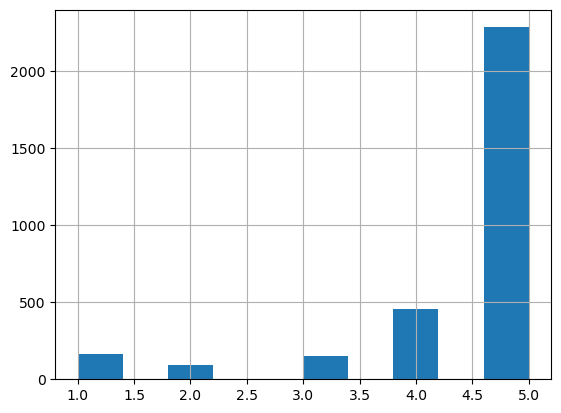

In [27]:
df['rating'].hist()

In [30]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [31]:
import matplotlib.pyplot as plt
import numpy as np

([<matplotlib.patches.Wedge at 0x72e569177d30>,
 [Text(-0.7168723123250899, 0.8343225322509749, '5'),
  Text(0.32799886507087783, -1.0499603537811397, '4'),
  Text(0.8733841623699299, -0.6687302183402334, '3'),
  Text(1.0365908625962095, -0.36807524174011824, '2'),
  Text(1.0950632802406932, -0.10409808964862599, '1')])

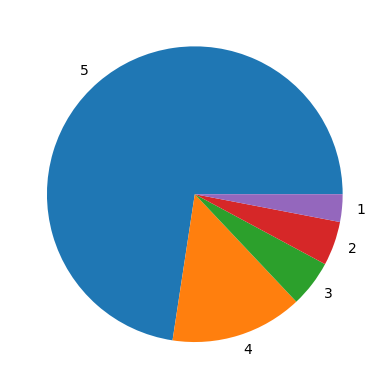

In [32]:
y = np.array(df['rating'].value_counts())
mylabels = [5,4,3,2,1]

plt.pie(y, labels = mylabels)

In [33]:
df[df['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [34]:
df[df['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [35]:
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


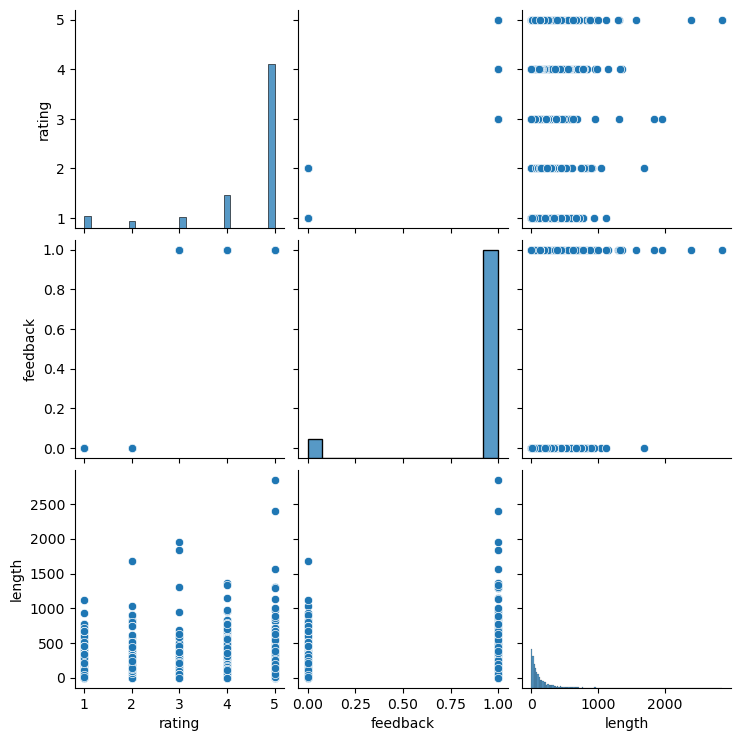

In [36]:
sns.pairplot(df)

In [37]:
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

<AxesSubplot:xlabel='variation'>

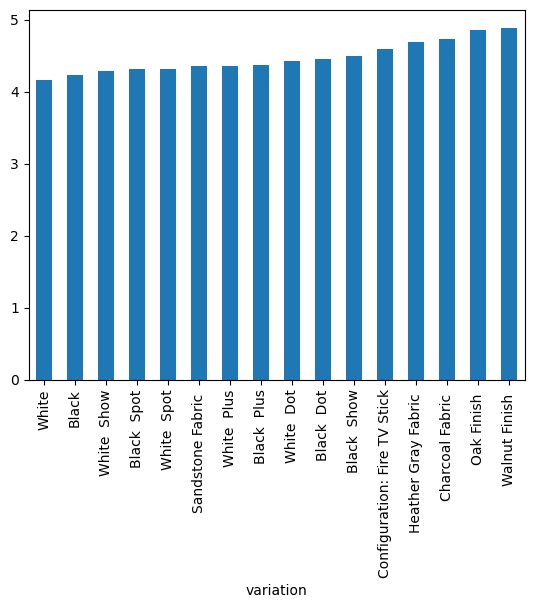

In [38]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar()

<AxesSubplot:ylabel='Frequency'>

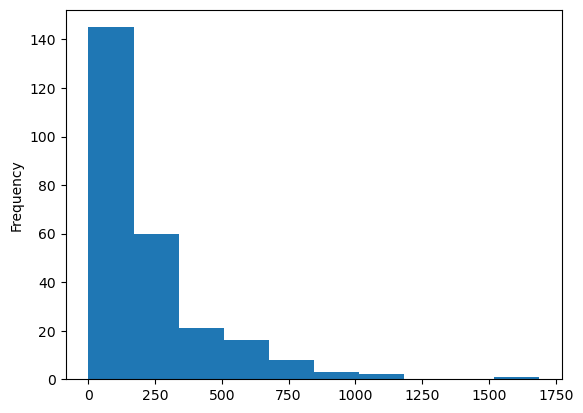

In [39]:
df[df['feedback'] == 0]['length'].sort_values().plot.hist()

<AxesSubplot:ylabel='Frequency'>

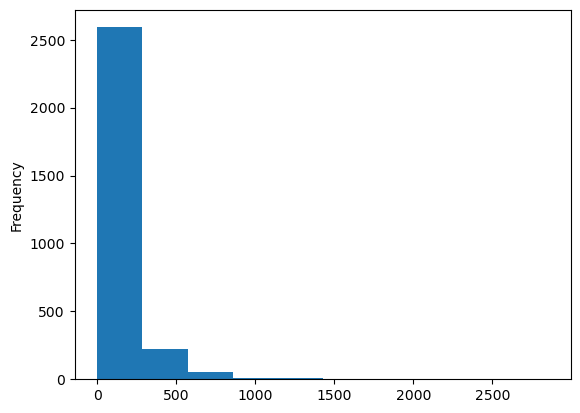

In [40]:
df[df['feedback'] == 1]['length'].sort_values().plot.hist()

<AxesSubplot:xlabel='rating'>

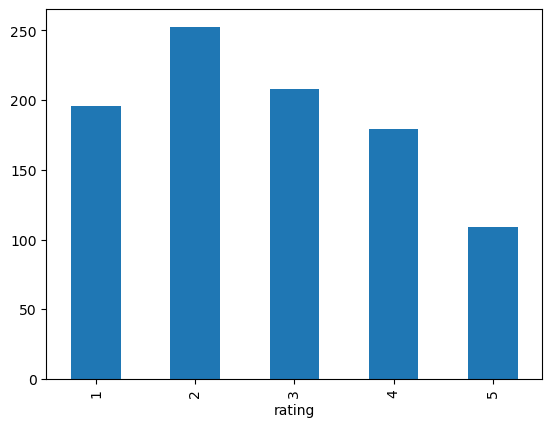

In [41]:
df.groupby('rating')['length'].mean().plot.bar()

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(df.verified_reviews)

In [44]:
rev = ''.join([r for r in df.verified_reviews])

In [45]:
from wordcloud import WordCloud

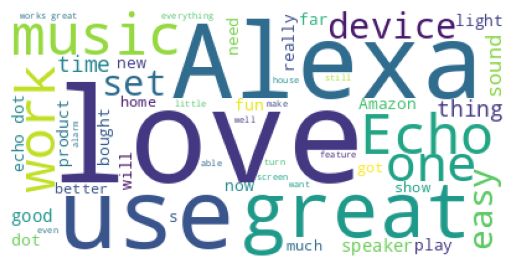

In [46]:
wc=WordCloud(background_color='white',max_words=50)
plt.imshow(wc.generate(rev))
plt.axis('off')
plt.show()

In [49]:
neg_rev = ''.join([r for r in df[df['feedback'] == 0].verified_reviews])
pos_rev = ''.join([r for r in df[df['feedback'] == 1].verified_reviews])

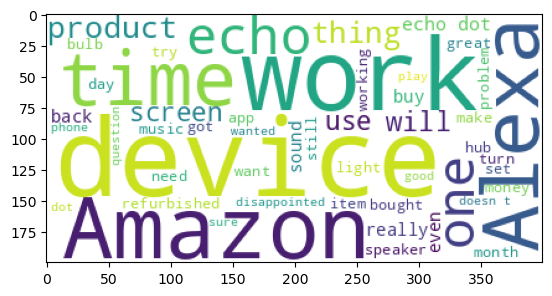

In [50]:
plt.imshow(wc.generate(neg_rev))

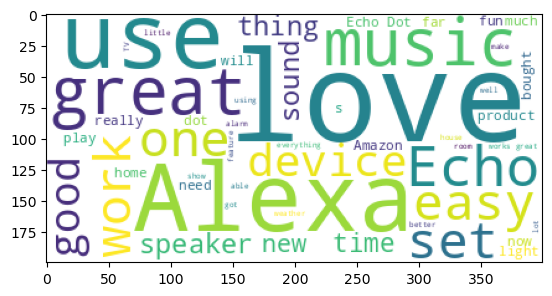

In [53]:
plt.imshow(wc.generate(pos_rev))

### preprocessing


To build the corpus from the 'verified_reviews' we perform the following -

    1. Replace any non alphabet characters with a space
    2. Covert to lower case and split into words
    3. Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus



In [59]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
import nltk

In [60]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aaditya/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [72]:
corpus=[]
stemmer=PorterStemmer()
for i in range(0,df.shape[0]):
    review=re.sub('[^a-zA-Z]',' ',df.iloc[i]['verified_reviews'])
    review=review.lower().split()
    review=[stemmer.stem(r) for r in review if r not in STOPWORDS]
    review=''.join(review)
    corpus.append(review)

In [70]:
corpus

['loveecho',
 'love',
 'sometimplaygameanswerquestioncorrectlialexasaygotwronganswerlikeablturnlightawayhome',
 'lotfunthingyroldlearndinosaurcontrollightplaygamelikecategorinicesoundplaymusicwell',
 'music',
 'receivechogiftneedanothbluetoothsomethplaymusiceasiliaccessfoundsmartspeakerwaitseeels',
 'withoutcellphoncannotusemanifeaturipadseeusegreatalarmuralmostdeafhearalarmbedroomliveroomreasonenoughkeepfunaskrandomquestionhearresponsseemsmartbonpolityet',
 'thinkthonepurchasworkgetoneeveriroomhousreallilikefeaturofferspecifiliplaymusicechocontrollightthroughouthous',
 'lookgreat',
 'lovelistensongheardsincchildhoodgetnewsweatherinformgreat',
 'sentyearolddadtalkconstantli',
 'lovelearnknewthingeveydaystillfigureverythworkfareasiuseunderstandmakelaughtime',
 'purchasmotherkneeproblemgivesomethtricomegetaroundfastlikeenjoylittlbigthingalexaplaysongtimecook',
 'lovelovelove',
 'expect',
 'lovewifehate',
 'reallihappipurchasgreatspeakereasiset',
 'usealexacoupldaylotfunnewtoylikenewhouse

In [73]:
cv=CountVectorizer(max_features=2500)

In [74]:
X=cv.fit_transform(corpus).toarray()
y=df['feedback'].values

In [79]:
import pickle

In [81]:
#saving count vectorizer
pickle.dump(cv,open('cv.pkl','wb'))

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_tr,x_te,y_tr,y_te=train_test_split(X,y,test_size=0.3,random_state=42)

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler=MinMaxScaler()
x_tr_scl=scaler.fit_transform(x_tr)
x_te_scl=scaler.fit_transform(x_te)

In [86]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf=RandomForestClassifier()
rf.fit(x_tr_scl,y_tr)

RandomForestClassifier()

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
print(f'accuracy is :{accuracy_score(y_te,rf.predict(x_te))} ')

accuracy is :0.9195767195767196 


In [91]:
from sklearn.svm import SVC

In [93]:
svc=SVC()
svc.fit(x_tr_scl,y_tr)

SVC()

In [94]:
print(f'accuracy is :{accuracy_score(y_te,svc.predict(x_te))} ')

accuracy is :0.9026455026455027 


In [97]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl.metadata (2.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 653.6 kB/s eta 0:00:00m eta 0:00:0136m0:00:06m


In [95]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xg=XGBClassifier()
xg.fit(x_tr_scl,y_tr)

In [ ]:
print(f'accuracy is :{accuracy_score(y_te,xg.predict(x_te))} ')